In [3]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read the csv file containing data on animal shelter in Sonoma County
shelter_data = pd.read_csv("Animal_Shelter_Data.csv")
shelter_data

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,K23-044095,TRUCK,A416206,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,03/10/2020,K23-044090,DS80,A399488,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,06/26/2011,K22-043405,VET,A414520,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,07/20/2013,K23-043813,DA27,A415428,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25003,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,K19-033988,CA02,A392014,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25004,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,K18-028720,CA01,A374156,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25005,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,K14-010771,DS70,A293651,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25006,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,K20-036116,DS91,A398415,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


### What are the most common names for dogs and cats in the shelter?

In [6]:
top_names = shelter_data.groupby(["Type","Name"], as_index=False).size()
top_names = top_names.sort_values(by='size', ascending=False).groupby(["Type"]).head(3)
top_names

,Type,Name,size
4615,DOG,BUDDY,131
6009,DOG,LUNA,115
4403,DOG,BELLA,104
2291,CAT,MILO,21
2197,CAT,LUCY,19
2685,CAT,SMOKEY,17
7742,OTHER,*JESSICA,9
7879,OTHER,*ROGER,7
8051,OTHER,OREO,5


From the table above, we can see that the top three most common names for dogs at the adoption centers are Buddy, Luna, and Bella. On the other hand, the top three most common names for adopted cats are Milo, Lucy, and Smokey.

# Outcomes

### We can assess the performance of the shelters in Sonoma County by analyzing the outcome types.

First, we'll drop the rows that contains null values for Outcome Type.

In [48]:
# Drop NA
shelter_data.dropna(subset=['Outcome Type'], inplace=True)
shelter_data.isnull().sum()

Name                    6500
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      35
Date Of Birth           6162
Impound Number             0
Kennel Number              0
Animal ID                  0
Intake Date                0
Outcome Date               0
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type               0
Outcome Subtype          317
Intake Condition           0
Outcome Condition        344
Intake Jurisdiction        0
Outcome Jurisdiction    3366
Outcome Zip Code        3424
Location                3424
Count                      0
dtype: int64

### Outcome by Species

In [49]:
# Select species and outcome type
outcome_data = shelter_data.loc[:,["Type", "Outcome Type"]]
outcome_data

,Type,Outcome Type
0,DOG,RETURN TO OWNER
1,OTHER,EUTHANIZE
2,DOG,RETURN TO OWNER
3,CAT,DISPOSAL
4,DOG,TRANSFER
...,...,...
25003,CAT,ADOPTION
25004,OTHER,TRANSFER
25005,DOG,EUTHANIZE
25006,DOG,TRANSFER


In [127]:
# Calculate the proportion of species within each outcome type
top_outcome = outcome_data.groupby([ "Type","Outcome Type"],as_index=False).size()
top_outcome = top_outcome.groupby([ "Type","Outcome Type"], group_keys=False).agg({"size":"sum"}).groupby(
    level=0,group_keys=False).apply(lambda x: 100*x/x.sum()).sort_values(
    by=["Type","size", "Outcome Type"], ascending=[False, False, True])
top_outcome =top_outcome.rename(columns={"size":"percent"})
top_outcome

percent
Type  Outcome Type              
OTHER TRANSFER         42.793682
      EUTHANIZE        21.816387
      ADOPTION         21.273445
      RETURN TO OWNER   9.871668
      DIED              2.270484
      DISPOSAL          1.727542
      ESCAPED/STOLEN    0.246792
DOG   RETURN TO OWNER  50.339310
      ADOPTION         23.551682
      TRANSFER         14.522466
      EUTHANIZE        10.815058
      RTOS              0.264305
      DISPOSAL          0.250018
      DIED              0.221444
      ESCAPED/STOLEN    0.035717
CAT   ADOPTION         40.938988
      TRANSFER         26.570651
      EUTHANIZE        16.273531
      RETURN TO OWNER  13.211613
      DISPOSAL          1.780449
      DIED              1.020640
      RTOS              0.124745
      ESCAPED/STOLEN    0.079383

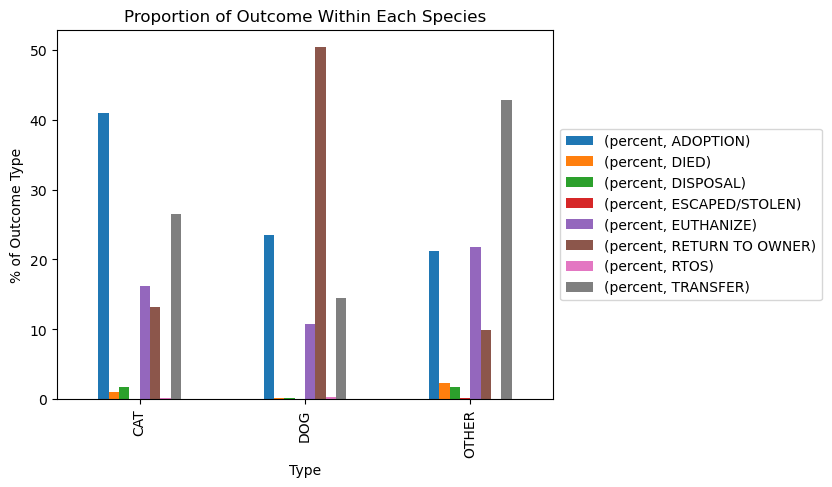

In [155]:
# Create bar plot to visualize most common outcome type within each species
ax = top_outcome.pivot_table(index="Type", columns="Outcome Type").plot(kind='bar')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("% of Outcome Type")
ax.set_title("Proportion of Outcome Within Each Species");

Adoption was the most common outcome for cats at 41%. Half of the dogs in the shelter are being returned to owner, whereas most of the other species (43%) are being transferred. 

### Evaluating yearly performance of the shelter based on (adoption rate, transfer rate, return to owner, euthanasia rate)
rate = variable/total # of intakes

In [160]:
# Display the overall rates for each species and outcome type throughout all years
rates_df = top_outcome.pivot_table(index="Type", columns="Outcome Type")
rates_df

percent                                                \
Outcome Type   ADOPTION      DIED  DISPOSAL ESCAPED/STOLEN  EUTHANIZE   
Type                                                                    
CAT           40.938988  1.020640  1.780449       0.079383  16.273531   
DOG           23.551682  0.221444  0.250018       0.035717  10.815058   
OTHER         21.273445  2.270484  1.727542       0.246792  21.816387   

                                                   
Outcome Type RETURN TO OWNER      RTOS   TRANSFER  
Type                                               
CAT                13.211613  0.124745  26.570651  
DOG                50.339310  0.264305  14.522466  
OTHER               9.871668       NaN  42.793682

In [274]:
# Add year column to the dataframe using Outcome Date
outcome_data2 = shelter_data.loc[:,["Outcome Date","Outcome Type"]]
outcome_data2["Outcome Date"] = pd.to_datetime(outcome_data2['Outcome Date'])
outcome_data2["year"] = pd.DatetimeIndex(outcome_data2['Outcome Date']).year
outcome_data2

,Outcome Date,Outcome Type,year
0,2022-12-26,RETURN TO OWNER,2022
1,2023-03-15,EUTHANIZE,2023
2,2023-03-15,RETURN TO OWNER,2023
3,2022-12-27,DISPOSAL,2022
4,2023-03-15,TRANSFER,2023
...,...,...,...
25003,2019-10-23,ADOPTION,2019
25004,2018-10-10,TRANSFER,2018
25005,2014-10-02,EUTHANIZE,2014
25006,2020-08-20,TRANSFER,2020


### Outcome and Rates

In [256]:
# Calculate the proportion of outcome type in each year
yearly_rate = outcome_data2.groupby([ "year","Outcome Type"],as_index=False).size()
yearly_rate = yearly_rate.groupby(["year","Outcome Type"], group_keys=False).agg({"size":"sum"}).groupby(
    level=0,group_keys=False).apply(lambda x: 100*x/x.sum()).sort_values(
    by=["year","size", "Outcome Type"], ascending=[True, False, True]).reset_index()
yearly_rate =yearly_rate.rename(columns={"size":"percent"})
yearly_rate

,year,Outcome Type,percent
0,2014,ADOPTION,37.566635
1,2014,RETURN TO OWNER,33.615553
2,2014,TRANSFER,14.016933
3,2014,EUTHANIZE,13.295704
4,2014,DIED,0.940734
...,...,...,...
66,2023,EUTHANIZE,13.112392
67,2023,DIED,1.008646
68,2023,DISPOSAL,1.008646
69,2023,RTOS,0.576369


In [273]:
# Function to plot trend line for rates given Outcome Type
def trend_proportion(Outcome):
    outcome_type = yearly_rate[yearly_rate["Outcome Type"]==Outcome]
    ax = outcome_type.plot(x="year",y="percent")
    ax.set_ylabel("% out of total intakes")
    ax.set_title("Proportion of "+Outcome+" by year")
    

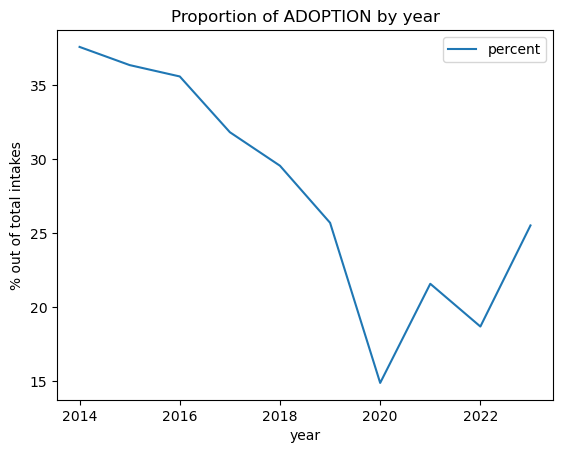

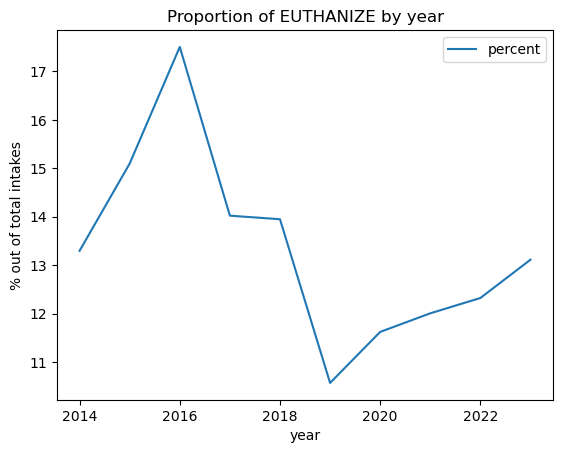

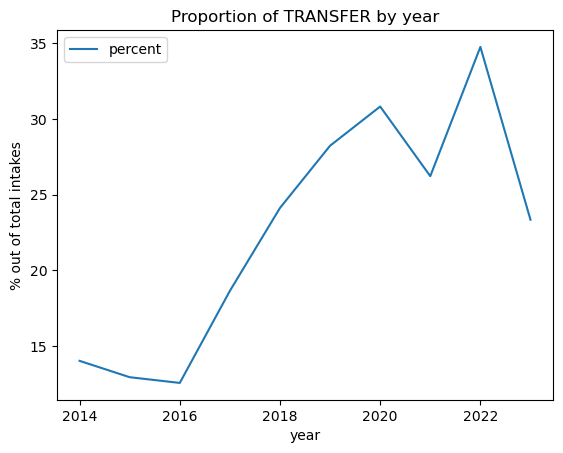

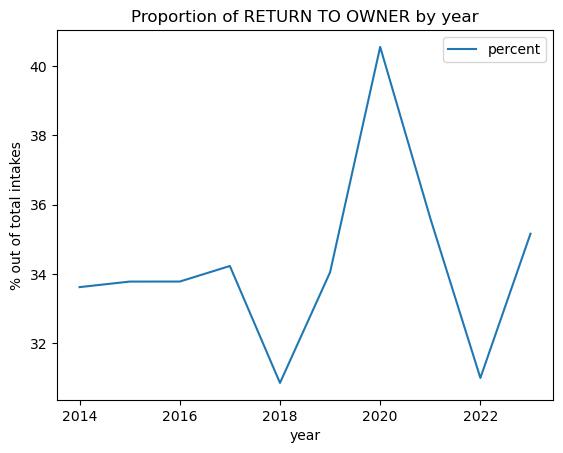

In [272]:
# Overall rates
adoption = trend_proportion("ADOPTION")
euthanize = trend_proportion("EUTHANIZE")
transferred = trend_proportion("TRANSFER")
rto = trend_proportion("RETURN TO OWNER")

It appears that as the adoption rate declines throughout the years, the shelter chooses to transfer than animals rather than euthanizing. 